# Importing Library

In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Loading Data

In [23]:
df = pd.read_csv('data_k_mean.txt', sep=' ', header=None)

In [24]:
df

,0,1
0,-7.87157,-4.86573
1,-4.76661,-6.87944
2,-6.67986,-5.83080
3,-8.93021,-4.15571
4,-7.91375,-4.22840
...,...,...
2995,-8.06037,-4.84080
2996,7.47328,0.37321
2997,6.91832,-0.32132
2998,-8.23828,-4.00405


In [25]:
len(df)

3000

In [26]:
input = np.array(df)

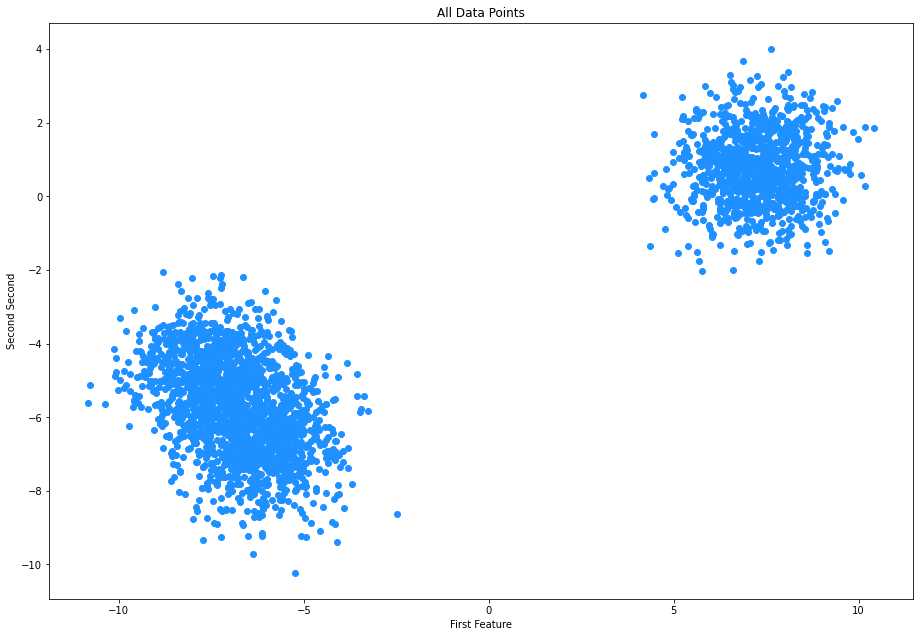

In [27]:
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.scatter(df[0], df[1], color='dodgerblue')
ax.set_xlabel('First Feature')
ax.set_ylabel('Second Second')
ax.set_title('All Data Points')
plt.show()

# Initializing Centroids and K

In [28]:
k = 2
k = k - 1 
centroids = np.array(df.iloc[random.randint(0, 3000)])
for i in range(k):
    centroids = np.vstack( (centroids, np.array(df.iloc[random.randint(0, 3000)]) ))
print(centroids)

[[ 5.89702 -0.02868]
 [ 7.522    1.03294]]


# K means Clustering

In [29]:

cls = []
for i in range(len(centroids)):
    cls.append([])

intermediate_centroids = np.zeros((len(centroids), 2))
stored_centroids = np.zeros((len(centroids), 2))
intermediate_centroids_counter = np.zeros((len(centroids)))


def euclidean_distance(point1, point2):
    return ((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)**0.5


def compute_centroid(data, cluster_no):
    global intermediate_centroids
    intermediate_centroids[cluster_no][0] = intermediate_centroids[cluster_no][0]+data[0]
    intermediate_centroids[cluster_no][1] = intermediate_centroids[cluster_no][1]+data[1]
    intermediate_centroids_counter[cluster_no] += 1

def set_new_centroids(centroid_x, centroid_y, centroid_no):
    centroids[centroid_no][0] = centroid_x
    centroids[centroid_no][1] = centroid_y

def reset_centroids():
    global intermediate_centroids, intermediate_centroids_counter, centroids
    for i in range(len(intermediate_centroids)):
        d = intermediate_centroids_counter[i]
        set_new_centroids(intermediate_centroids[i][0]/d, intermediate_centroids[i][1]/d, i)

    intermediate_centroids = np.zeros((len(centroids), 2))
    intermediate_centroids_counter = np.zeros((len(centroids)))


for x in range(500):
    #print('Iteration :', x+1, '\n', centroids, '\n')
    stored_centroids = centroids.copy()
    for i in range(len(input)):
        diff = 99999
        cluster_no = -1
        for j in range(len(centroids)):
            dist = euclidean_distance(input[i], centroids[j])
            if dist < diff:
                diff = dist
                cluster_no = j
        compute_centroid(input[i], cluster_no)
        #print(input[i], ' Belongs to Cluster : ', cluster_no+1)
        cls[cluster_no].append((input[i]))

    reset_centroids()
    print()
    if np.array_equal(centroids, stored_centroids):
        break


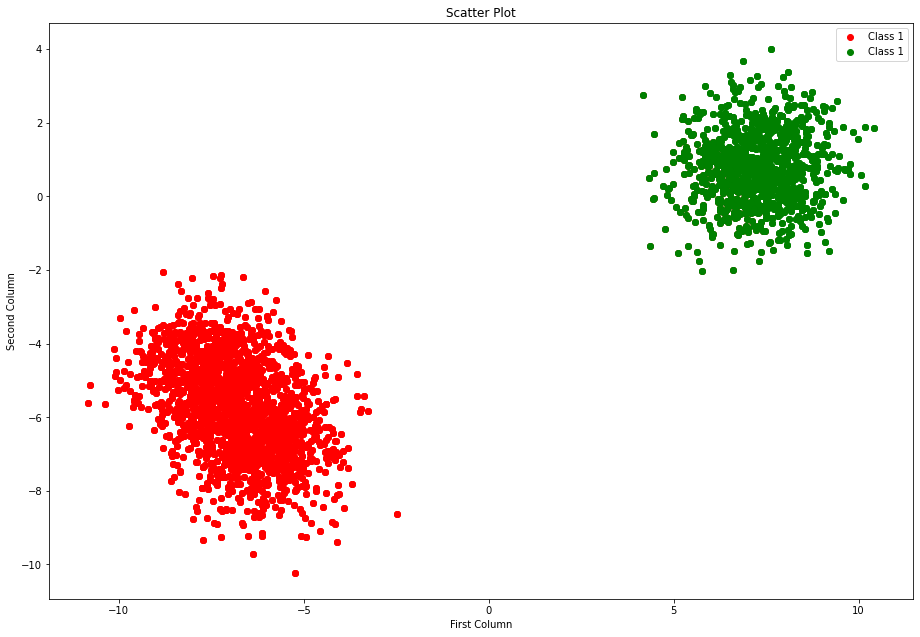

In [30]:
colors = ['r','g','b','y', 'black','deepskyblue']
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
for i in range(len(centroids)):
    df1 = pd.DataFrame(cls[i], columns = [0,1])
    ax.scatter(df1[0], df1[1], color=colors[i], label="Class 1")
ax.set_xlabel('First Column')
ax.set_ylabel('Second Column')
ax.set_title('Scatter Plot')
plt.legend(loc="upper right")
plt.show()